In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("df_train_cleaned.csv",index_col=0)
df.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender
0,16,2.6,1.2,236,131,90,5.4,2.6,0.9,1,1
1,40,0.9,0.3,293,232,245,6.8,3.1,0.8,1,2
2,60,2.6,1.2,171,42,37,5.4,2.7,1.0,1,1
3,36,2.8,1.5,305,28,76,5.9,2.5,0.7,1,1
4,55,0.8,0.2,290,139,87,7.0,3.0,0.7,1,1


In [7]:
y = df.is_patient                          # M or B 

C:\Users\Saransh Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


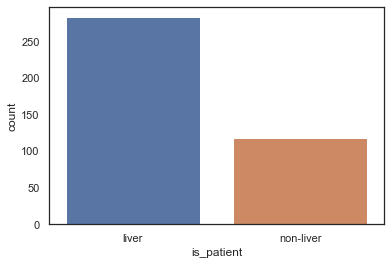

In [63]:
y.loc[y==1] = "Liver"
y.loc[y==2] = "Non-liver"
ax = sns.countplot(y,label="Count")

In [17]:
y = df.is_patient
x = df.drop("is_patient",axis=1)
x.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,gender
0,16,2.6,1.2,236,131,90,5.4,2.6,0.9,1
1,40,0.9,0.3,293,232,245,6.8,3.1,0.8,2
2,60,2.6,1.2,171,42,37,5.4,2.7,1.0,1
3,36,2.8,1.5,305,28,76,5.9,2.5,0.7,1
4,55,0.8,0.2,290,139,87,7.0,3.0,0.7,1


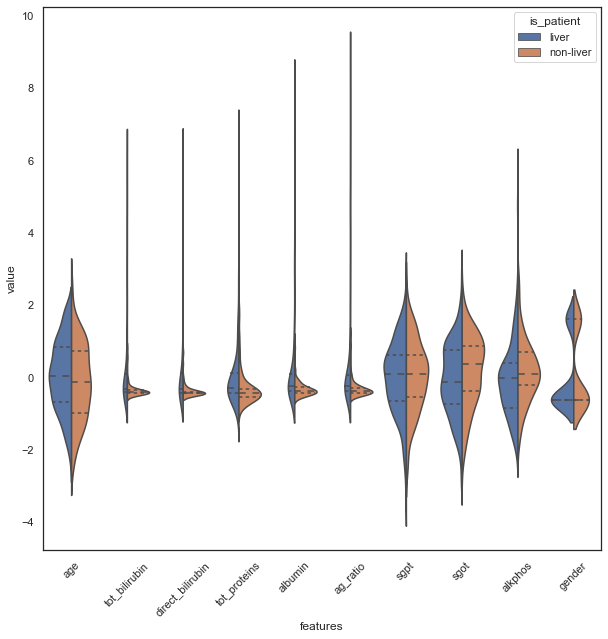

In [64]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2],axis=1)
data = pd.melt(data,id_vars="is_patient",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="is_patient", data=data,split=True, inner="quart")
plt.xticks(rotation=45);



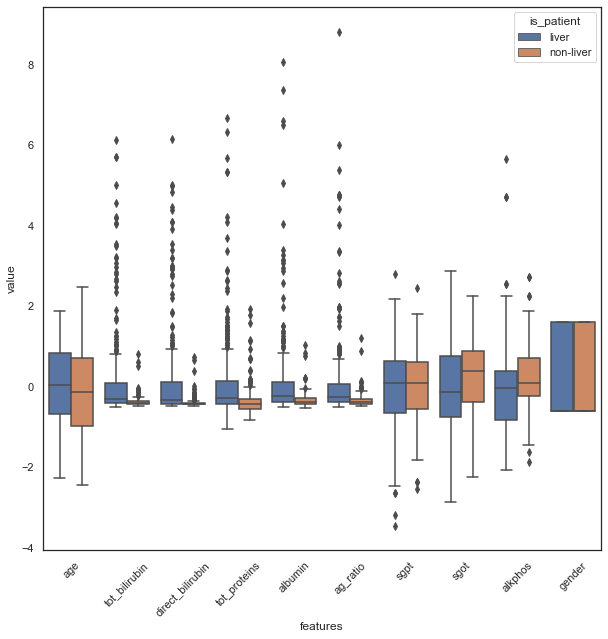

In [65]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2],axis=1)
data = pd.melt(data,id_vars="is_patient",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="is_patient", data=data)
plt.xticks(rotation=45);


<Figure size 1800x1800 with 0 Axes>

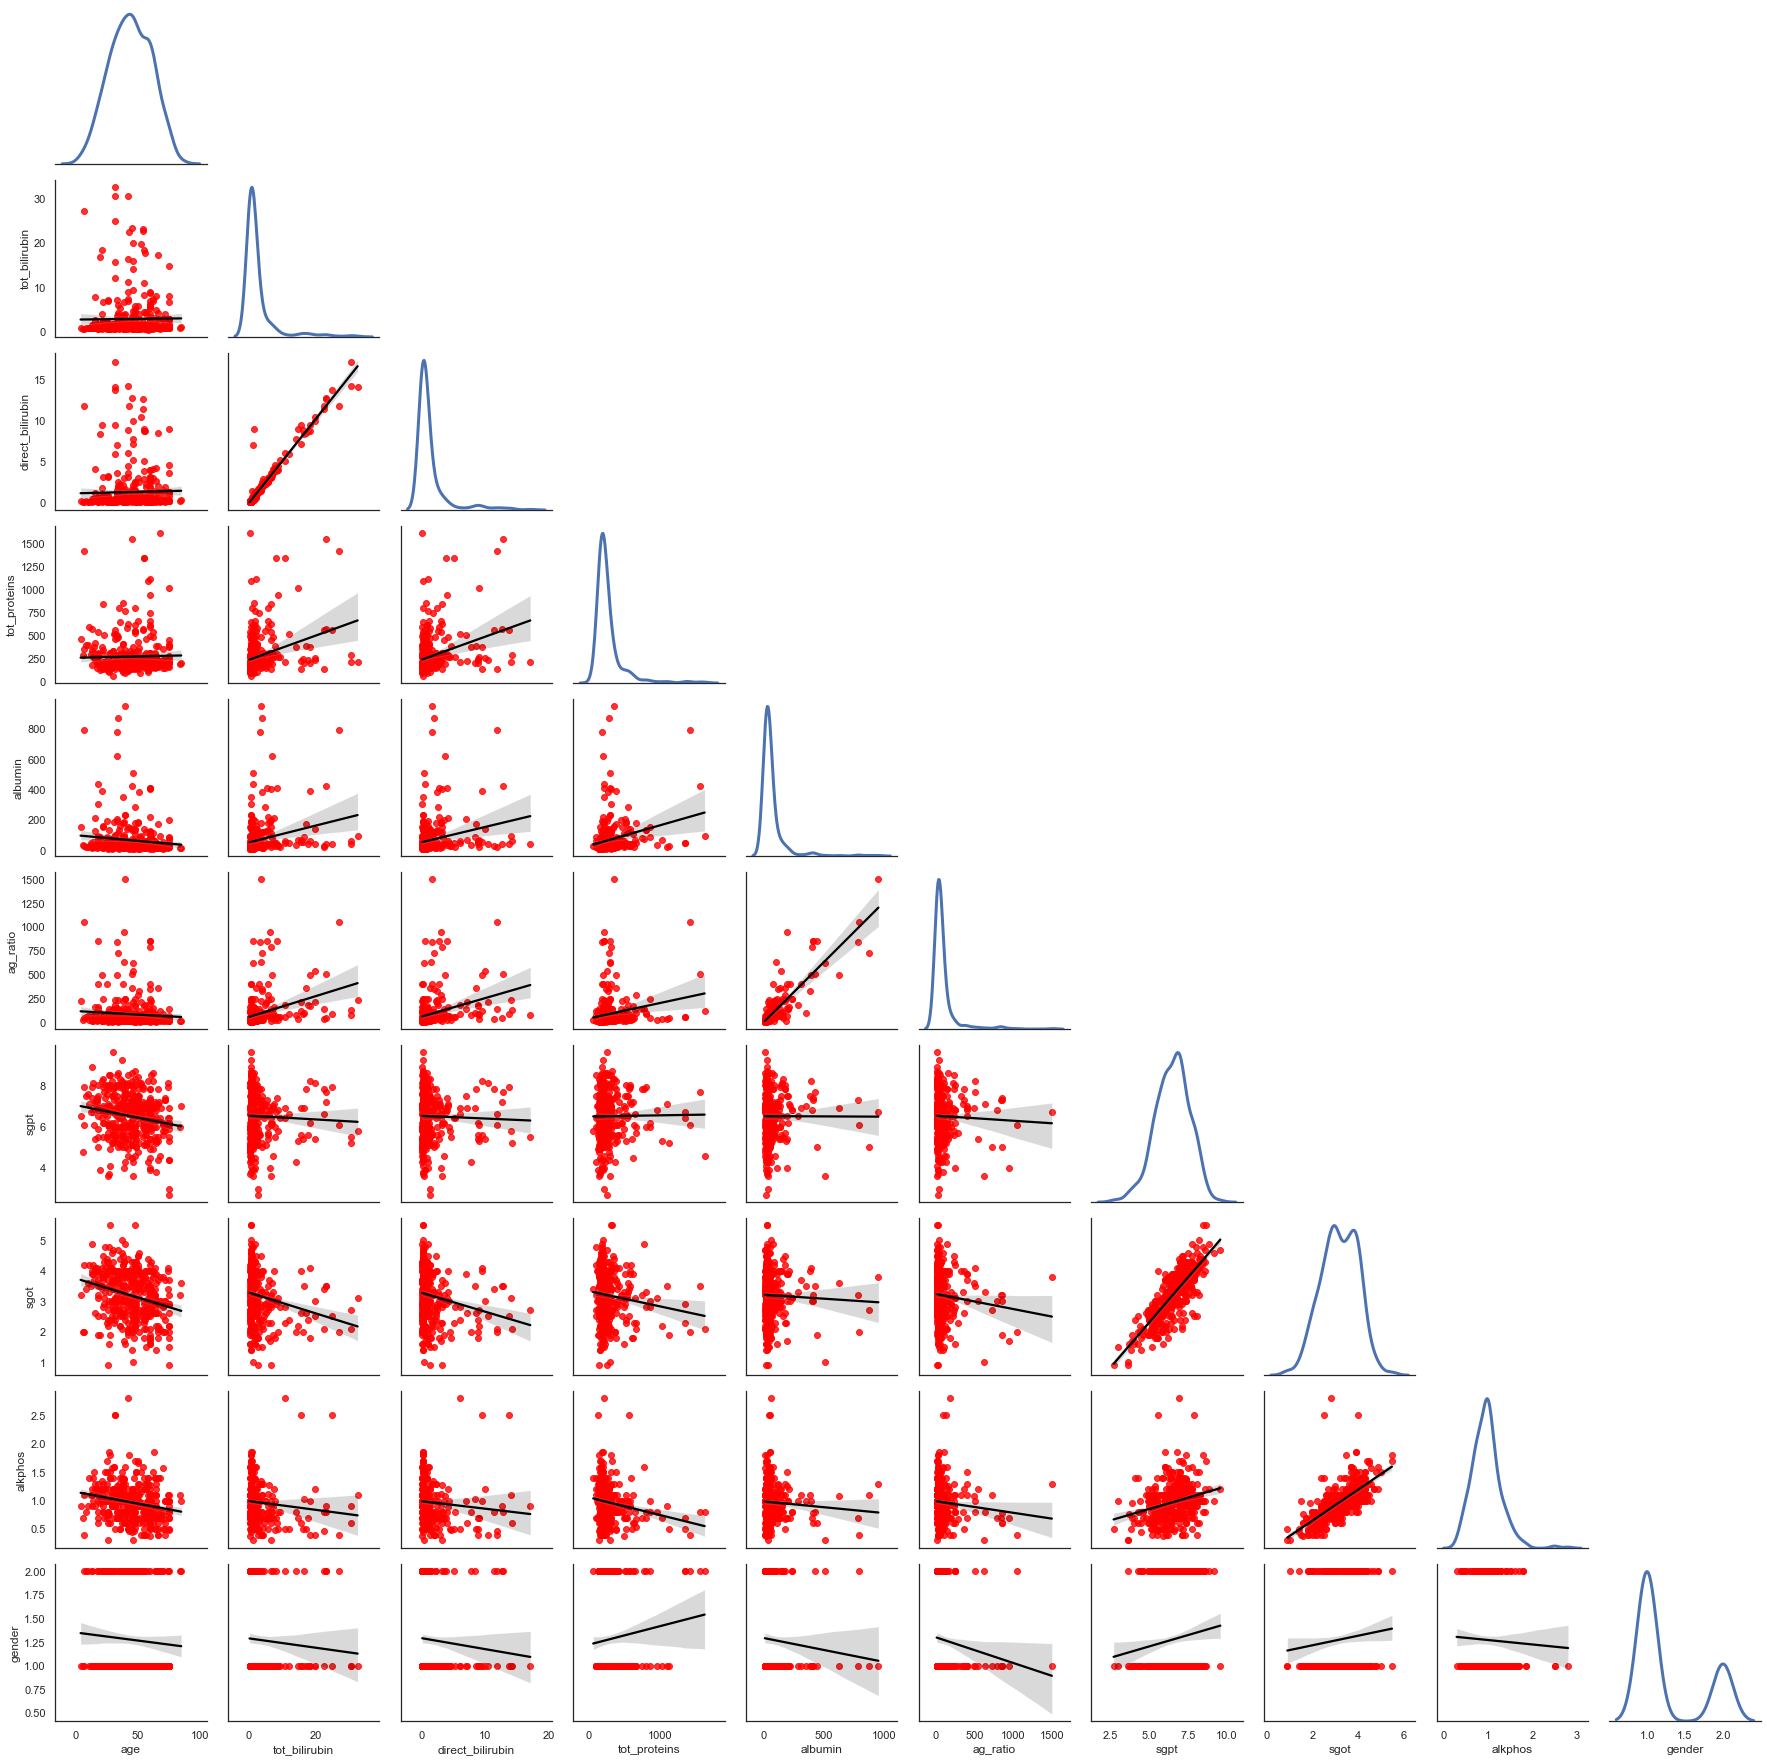

In [66]:
plt.figure(figsize=(25,25))
sns.set(style="white")
g = sns.PairGrid(x, diag_sharey=False,corner=True);
g.map_lower(sns.regplot,scatter_kws={"color": "red"}, line_kws={"color": "black"});
g.map_diag(sns.kdeplot, lw=3);


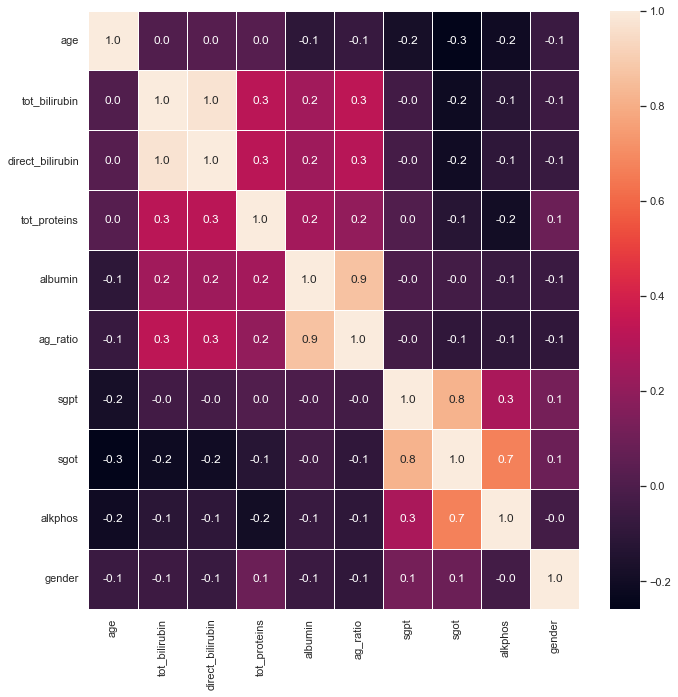

In [67]:
f,ax = plt.subplots(figsize=(11, 11))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);


In [69]:
data = pd.read_csv("df_train_cleaned.csv")

In [70]:
data.head()

,Unnamed: 0,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender
0,0,16,2.6,1.2,236,131,90,5.4,2.6,0.9,1,1
1,1,40,0.9,0.3,293,232,245,6.8,3.1,0.8,1,2
2,2,60,2.6,1.2,171,42,37,5.4,2.7,1.0,1,1
3,3,36,2.8,1.5,305,28,76,5.9,2.5,0.7,1,1
4,4,55,0.8,0.2,290,139,87,7.0,3.0,0.7,1,1


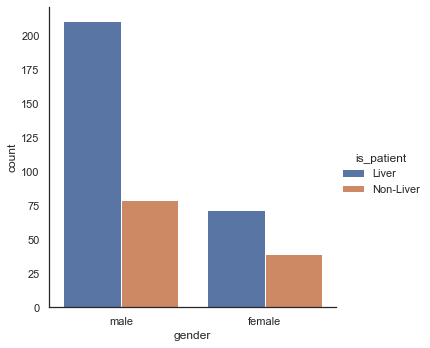

In [71]:
data.loc[data['gender']==1,'gender'] ="male"
data.loc[data['gender']==2,'gender'] ="female"
data.loc[data['is_patient']==1,'is_patient']="Liver"
data.loc[data['is_patient']==2,'is_patient']="Non-Liver"
sns.catplot(x ="gender", hue ="is_patient",kind ="count", data = data)
plt.savefig('gender vs patient count.jpg',bbox_inches='tight', dpi=300)